<span style="font-size:30px; font-weight:bold; line-height:1.2;">Linear Regression - US bike-sharing provider 'BoomBikes'</span>

# Table of Contents

### 1. Importing Libraries and Dataset
### 2. Data Understanding
### 3. Exploratory Data Analysis
### 4. Data Preparation
### 5. Model Building
### 6. Model Evaluation (Assumptions Check)
### 7. Model Testing
### 8. Model Inference

# 1. Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Suppress Warnings

## Importing dataset

In [2]:
bike = pd.read_csv('day.csv')

# 2. Data Understanding

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

# 3. Exploratory Data Analysis

## Dropping unwanted variables

In [5]:
bike = bike.drop(['instant','casual','registered','dteday'], axis=1)

In [6]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Extracting weekends from weekday

In [7]:
bike['Weekend'] = bike['weekday'].apply(lambda x: 1 if x in [0,6] else 0)

In [8]:
bike.tail()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Weekend
725,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,2114,0
726,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,3095,1
727,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,1341,1
728,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,1796,0
729,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,2729,0


## Correlations Check (Pair Plot)

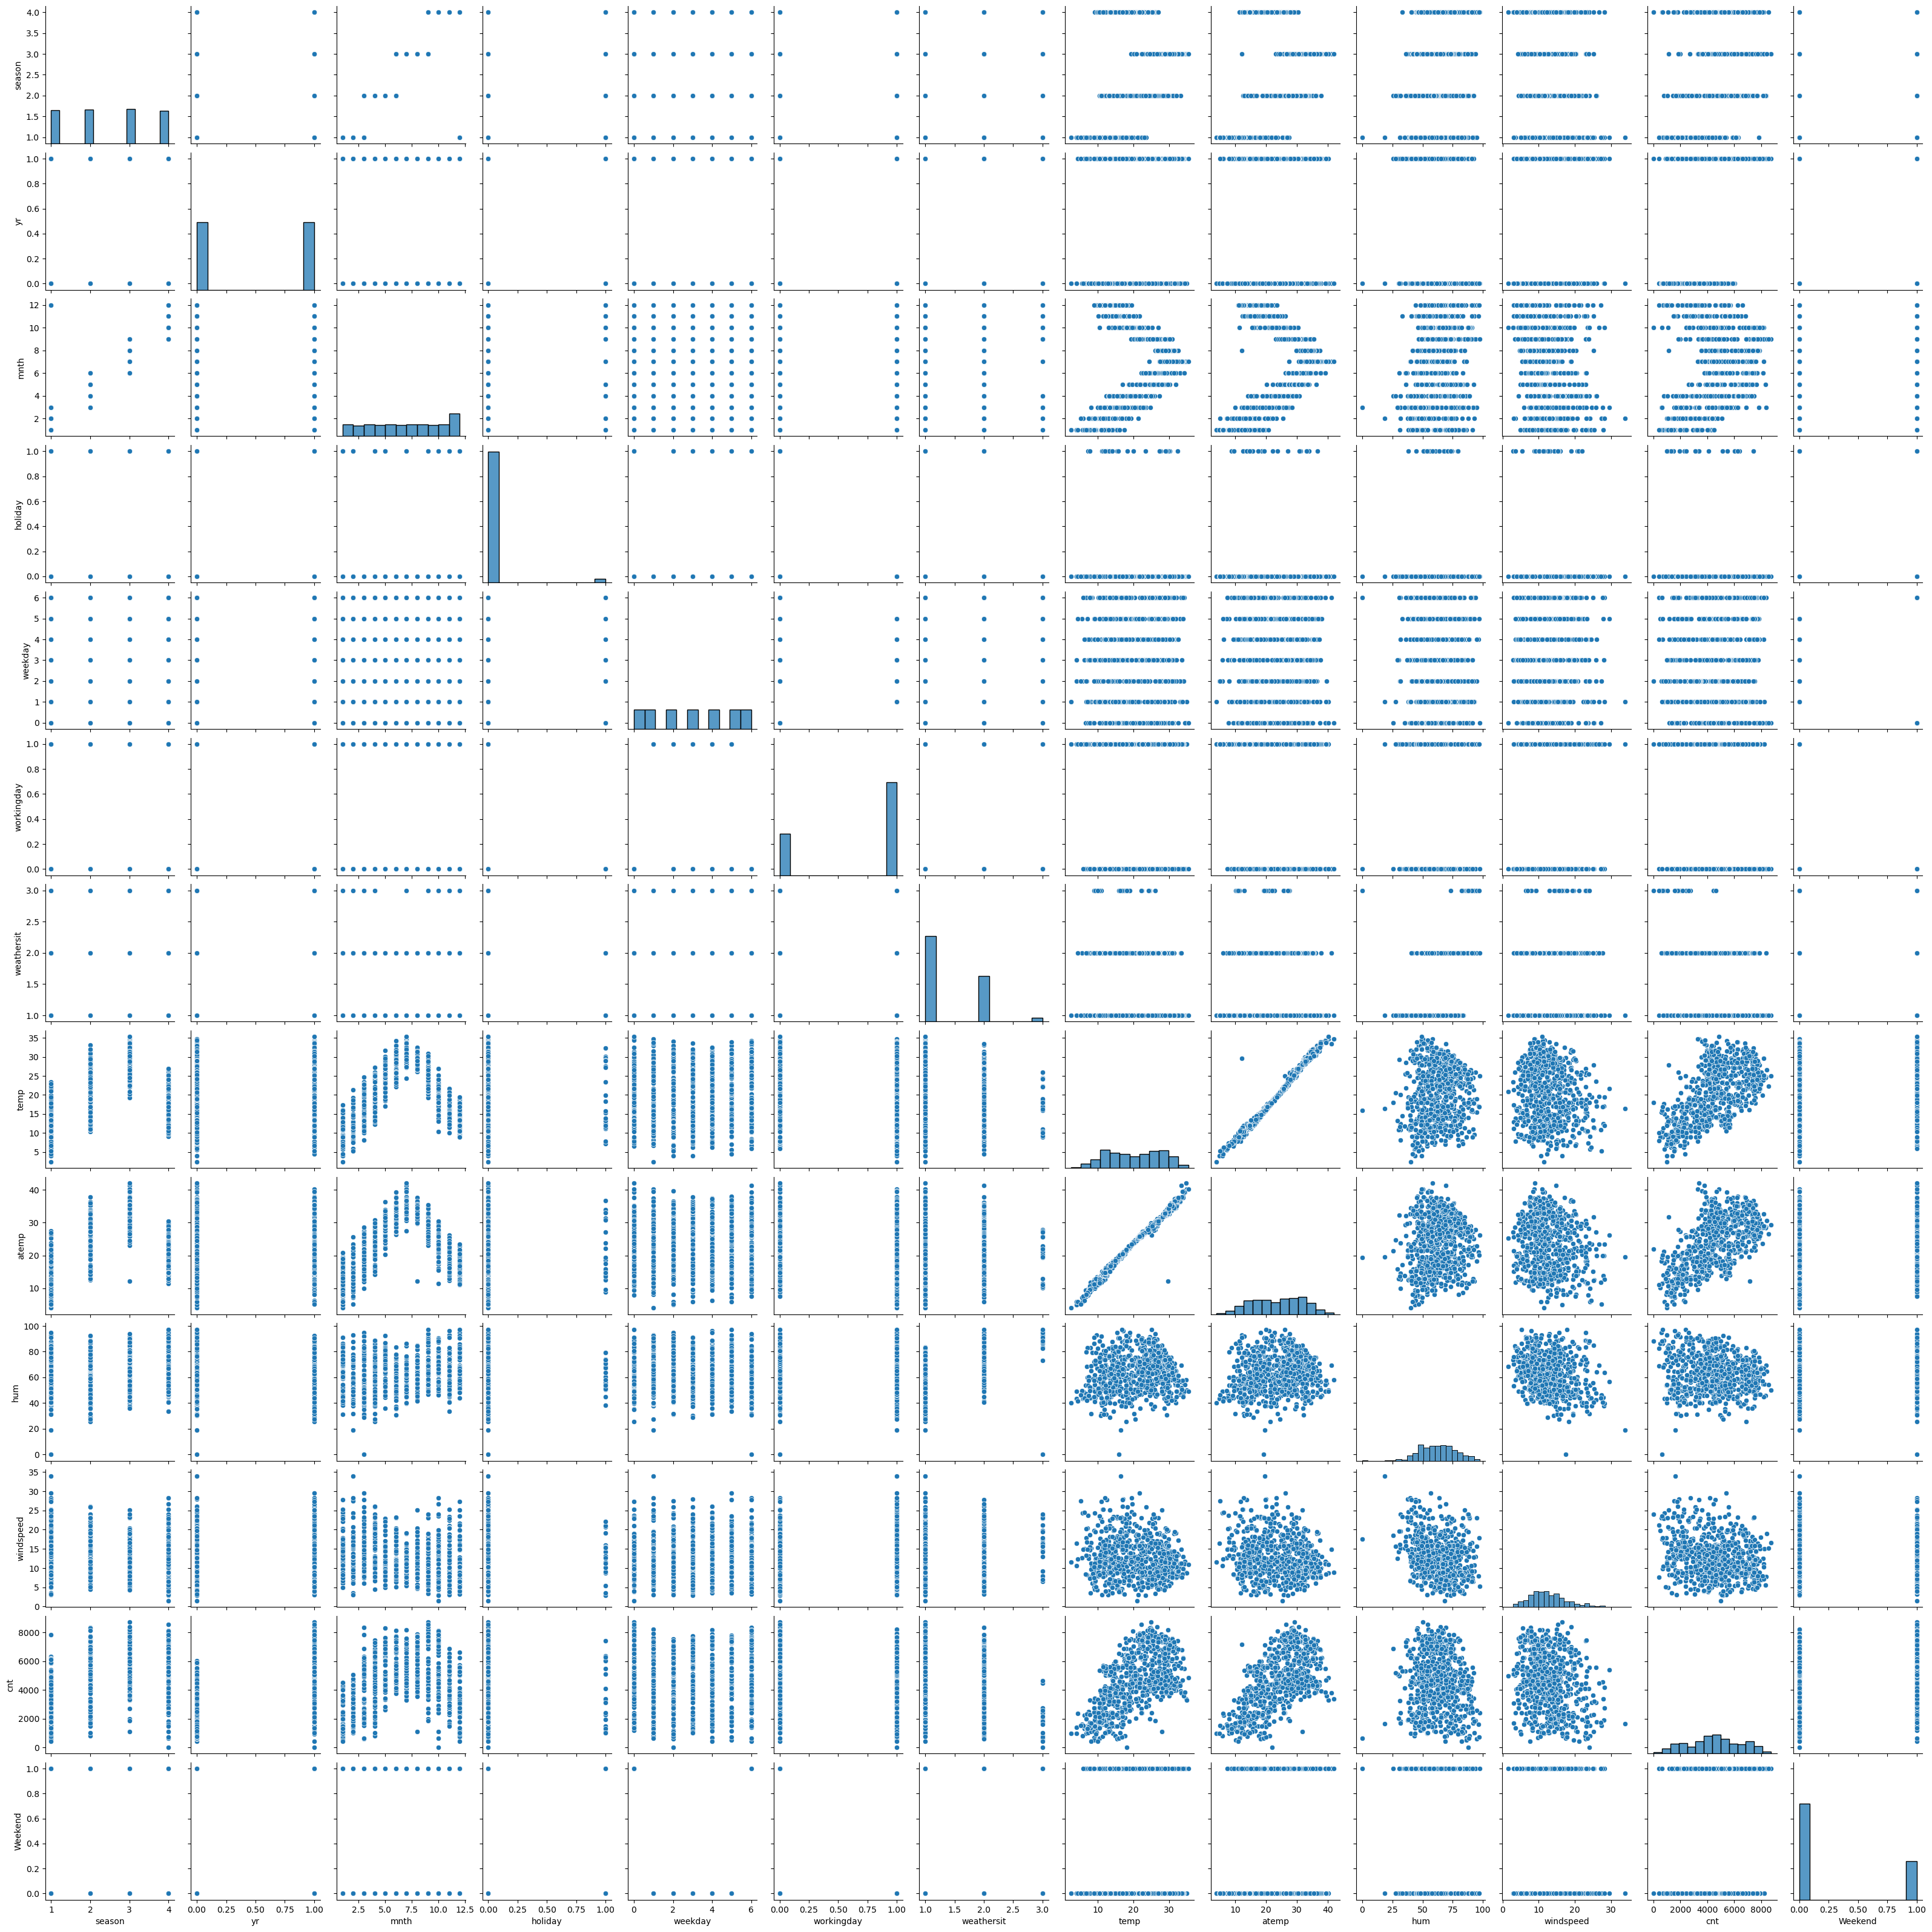

In [9]:
sns.pairplot(data = bike)
plt.show()

In [10]:
bike1 = bike.copy()

In [11]:
bike1['season'] = bike1['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
bike1['mnth'] = bike1['mnth'].map({1:'Jan', 2:'Feb', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
bike1['weekday'] = bike1['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

In [12]:
bike1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Weekend
0,Spring,0,Jan,0,Mon,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,Spring,0,Jan,0,Tue,1,2,14.902598,17.68695,69.6087,16.652113,801,0
2,Spring,0,Jan,0,Wed,1,1,8.050924,9.47025,43.7273,16.636703,1349,0
3,Spring,0,Jan,0,Thu,1,1,8.200000,10.60610,59.0435,10.739832,1562,0
4,Spring,0,Jan,0,Fri,1,1,9.305237,11.46350,43.6957,12.522300,1600,0


## Checking the Relation Between Categorical, Numerical Variables and the Target Variable ('cnt')

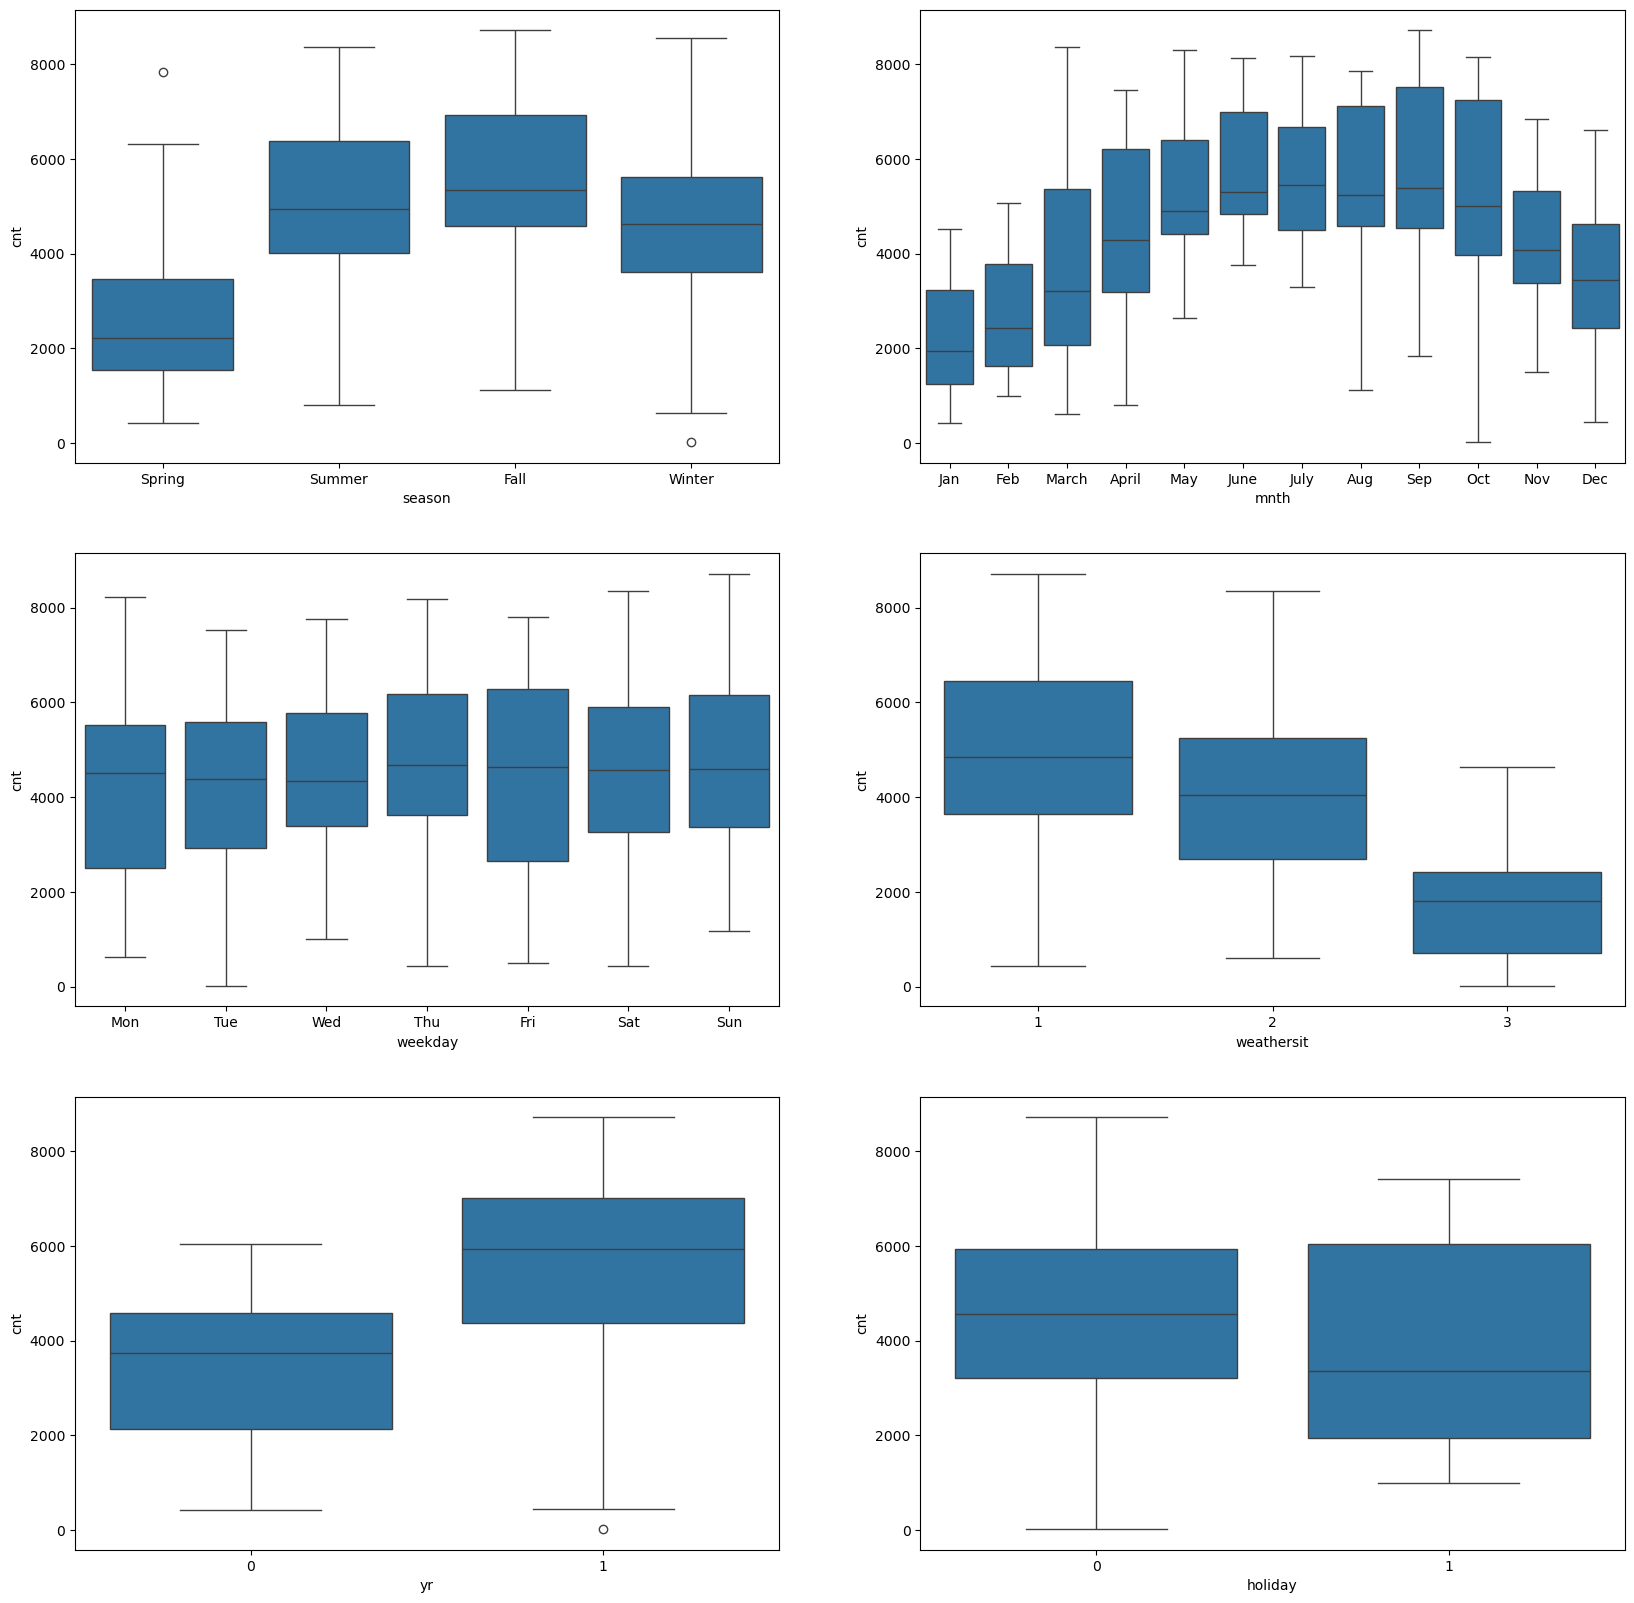

In [13]:
plt.figure(figsize=(20, 20))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike1)
plt.subplot(3,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike1)
plt.subplot(3,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike1)
plt.subplot(3,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike1)
plt.subplot(3,2,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike1)
plt.subplot(3,2,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike1)
plt.show()

## Checking the Relation Between Numerical Variables and the Target Variable ('cnt')

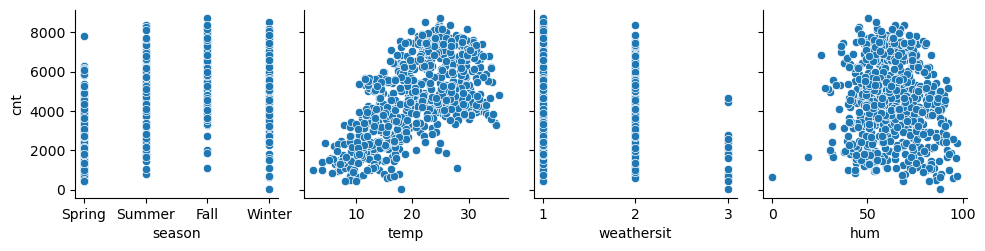

In [14]:
sns.pairplot(x_vars=['season', 'temp', 'weathersit', 'hum'], y_vars=['cnt'], data=bike1)
plt.show()

## Checking the Relation Between Numerical Variables and the Target Variable ('cnt')

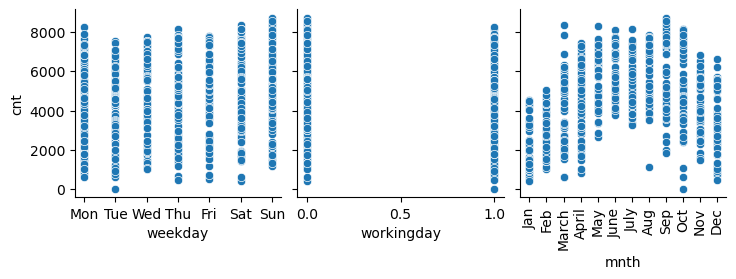

In [15]:
sns.pairplot(x_vars=['weekday', 'workingday', 'mnth'], y_vars='cnt', data=bike1)
plt.xticks(rotation=90)
plt.show()

In [16]:
bike1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Weekend
0,Spring,0,Jan,0,Mon,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,Spring,0,Jan,0,Tue,1,2,14.902598,17.68695,69.6087,16.652113,801,0
2,Spring,0,Jan,0,Wed,1,1,8.050924,9.47025,43.7273,16.636703,1349,0
3,Spring,0,Jan,0,Thu,1,1,8.200000,10.60610,59.0435,10.739832,1562,0
4,Spring,0,Jan,0,Fri,1,1,9.305237,11.46350,43.6957,12.522300,1600,0


## Correlation Check (Heatmap)

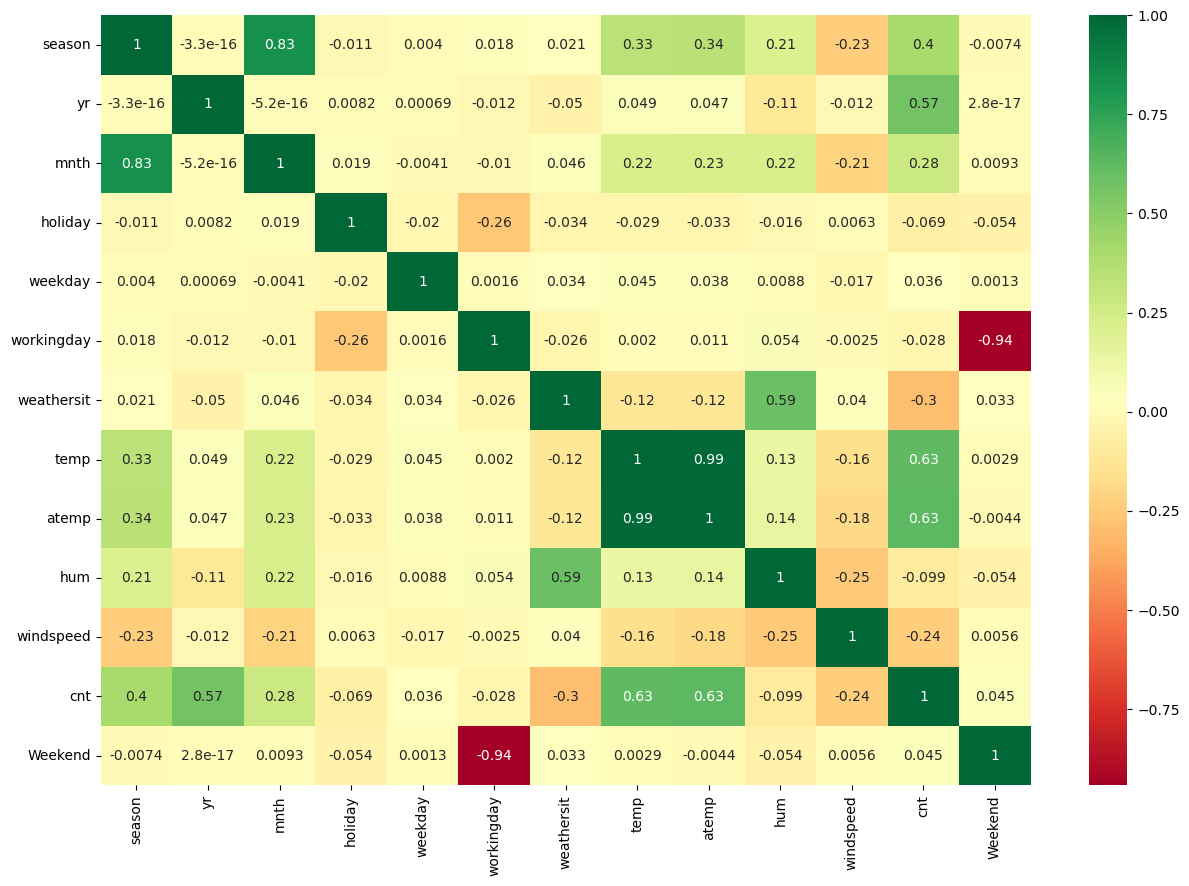

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(data=bike.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [18]:
bike1 = bike1.drop('atemp', axis=1)

In [19]:
bike1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Weekend
0,Spring,0,Jan,0,Mon,1,2,14.110847,80.5833,10.749882,985,0
1,Spring,0,Jan,0,Tue,1,2,14.902598,69.6087,16.652113,801,0
2,Spring,0,Jan,0,Wed,1,1,8.050924,43.7273,16.636703,1349,0
3,Spring,0,Jan,0,Thu,1,1,8.200000,59.0435,10.739832,1562,0
4,Spring,0,Jan,0,Fri,1,1,9.305237,43.6957,12.522300,1600,0


### Year on Year Growth of Rental Bikes

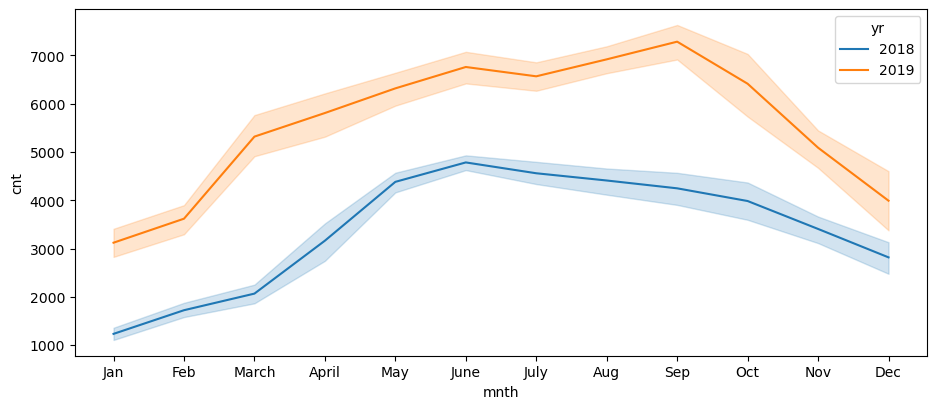

In [20]:
bike2=bike1.copy()
bike2['yr'] = bike1['yr'].map({0:'2018', 1:'2019'})
plt.figure(figsize=(11,4.5))
sns.lineplot(x='mnth', y='cnt', data=bike2, hue='yr')
plt.show()

In [21]:
bike1.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [22]:
bike1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Weekend
0,Spring,0,Jan,0,Mon,1,2,14.110847,80.5833,10.749882,985,0
1,Spring,0,Jan,0,Tue,1,2,14.902598,69.6087,16.652113,801,0
2,Spring,0,Jan,0,Wed,1,1,8.050924,43.7273,16.636703,1349,0
3,Spring,0,Jan,0,Thu,1,1,8.200000,59.0435,10.739832,1562,0
4,Spring,0,Jan,0,Fri,1,1,9.305237,43.6957,12.522300,1600,0


## Creating dummy variables

In [23]:
bike1 = pd.concat([
    bike1.drop(['season', 'mnth', 'weekday'], axis=1),
    pd.get_dummies(bike1[['season', 'mnth', 'weekday']], drop_first=True).astype(int)
], axis=1)

In [24]:
bike1.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,Weekend,season_Spring,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,0,0,1,2,14.110847,80.5833,10.749882,985,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,2,14.902598,69.6087,16.652113,801,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,1,8.050924,43.7273,16.636703,1349,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,1,8.200000,59.0435,10.739832,1562,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,9.305237,43.6957,12.522300,1600,0,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
dummies = pd.get_dummies(bike1['weathersit'], prefix='weathersit', drop_first=True)
bike1 = bike1.drop('weathersit', axis=1)
bike1 = pd.concat([bike1, dummies], axis=1)

In [26]:
bike1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   Weekend        730 non-null    int64  
 8   season_Spring  730 non-null    int32  
 9   season_Summer  730 non-null    int32  
 10  season_Winter  730 non-null    int32  
 11  mnth_Aug       730 non-null    int32  
 12  mnth_Dec       730 non-null    int32  
 13  mnth_Feb       730 non-null    int32  
 14  mnth_Jan       730 non-null    int32  
 15  mnth_July      730 non-null    int32  
 16  mnth_June      730 non-null    int32  
 17  mnth_March     730 non-null    int32  
 18  mnth_May  

In [27]:
bike1.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'Weekend', 'season_Spring', 'season_Summer', 'season_Winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [28]:
bike1.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
yr,730.0,NaN,NaN,NaN,0.5,0.500343,0.0,0.0,0.5,1.0,1.0
holiday,730.0,NaN,NaN,NaN,0.028767,0.167266,0.0,0.0,0.0,0.0,1.0
workingday,730.0,NaN,NaN,NaN,0.690411,0.462641,0.0,0.0,1.0,1.0,1.0
temp,730.0,NaN,NaN,NaN,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
hum,730.0,NaN,NaN,NaN,62.765175,14.237589,0.0,52.0,62.625,72.989575,97.25
windspeed,730.0,NaN,NaN,NaN,12.76362,5.195841,1.500244,9.04165,12.125325,15.625589,34.000021
cnt,730.0,NaN,NaN,NaN,4508.006849,1936.011647,22.0,3169.75,4548.5,5966.0,8714.0
Weekend,730.0,NaN,NaN,NaN,0.284932,0.451691,0.0,0.0,0.0,1.0,1.0
season_Spring,730.0,NaN,NaN,NaN,0.246575,0.431313,0.0,0.0,0.0,0.0,1.0
season_Summer,730.0,NaN,NaN,NaN,0.252055,0.43449,0.0,0.0,0.0,1.0,1.0


## 4. Data Preparation

In [29]:
np.random.seed(0)
df_train, df_test = train_test_split(bike1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [30]:
scaler = MinMaxScaler()

### Re-Scaling Both the Train and Test Data Using Min-Max Scaling Method

In [31]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [32]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Weekend,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,...,1,0,0,0,0,0,0,1,False,False
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,False,False
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,1,0,...,0,0,0,0,1,0,0,0,True,False
728,1,0,1,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,0,1,0,0,0,0,0,False,False
482,1,0,0,0.395666,0.504508,0.188475,0.482973,1,0,1,...,0,0,0,0,1,0,0,0,True,False


In [33]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.711765,0.453386,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.537262,0.225844,0.0,0.339853,0.540519,0.735215,1.0
hum,510.0,0.650369,0.145882,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320768,0.169797,0.0,0.199179,0.296763,0.414447,1.0
cnt,510.0,0.513620,0.224593,0.0,0.356420,0.518638,0.684710,1.0
Weekend,510.0,0.266667,0.442651,0.0,0.000000,0.000000,1.000000,1.0
season_Spring,510.0,0.243137,0.429398,0.0,0.000000,0.000000,0.000000,1.0
season_Summer,510.0,0.245098,0.430568,0.0,0.000000,0.000000,0.000000,1.0


### Assigning the X_train, y_train and X_test, y_test

In [34]:
y_train = df_train.pop('cnt')
X_train = df_train
y_test = df_test.pop('cnt') 
X_test = df_test

## 5. Model Building
### Automating Variable Selection Using RFE Method (18 Variables)

In [35]:
lr = LinearRegression()
rfe=RFE(estimator=lr, n_features_to_select=18)
rfe.fit(X_train, y_train)
top_rfe_var=pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
top_rfe_var.columns=['Features','Choosen','Ranking']
top_rfe_var=top_rfe_var.sort_values(by='Ranking').reset_index(drop=True)
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

In [36]:
top_rfe_var

,Features,Choosen,Ranking
0,yr,True,1
1,mnth_Sep,True,1
2,mnth_Nov,True,1
3,weathersit_2,True,1
4,mnth_Jan,True,1
5,mnth_Feb,True,1
6,mnth_Dec,True,1
7,season_Winter,True,1
8,mnth_July,True,1
9,season_Spring,True,1


In [37]:
print(X_train_rfe.dtypes)

yr                 int64
holiday            int64
workingday         int64
temp             float64
hum              float64
windspeed        float64
Weekend            int64
season_Spring      int32
season_Summer      int32
season_Winter      int32
mnth_Dec           int32
mnth_Feb           int32
mnth_Jan           int32
mnth_July          int32
mnth_Nov           int32
mnth_Sep           int32
weathersit_2        bool
weathersit_3        bool
dtype: object


In [38]:
X_train_rfe = X_train_rfe.astype(float)

In [39]:
print(X_train_rfe.dtypes)

yr               float64
holiday          float64
workingday       float64
temp             float64
hum              float64
windspeed        float64
Weekend          float64
season_Spring    float64
season_Summer    float64
season_Winter    float64
mnth_Dec         float64
mnth_Feb         float64
mnth_Jan         float64
mnth_July        float64
mnth_Nov         float64
mnth_Sep         float64
weathersit_2     float64
weathersit_3     float64
dtype: object


## Model 1

### Adding Constant and Fitting Regression Line 

In [40]:
X_train_rfe_cons = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_rfe_cons).fit()

### Model Summary

In [41]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     152.0
Date:                Thu, 23 Jan 2025   Prob (F-statistic):          1.83e-187
Time:                        20:25:17   Log-Likelihood:                 518.63
No. Observations:                 510   AIC:                            -999.3
Df Residuals:                     491   BIC:                            -918.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3802      0.081      4.718      0.000       0.222       0.539
yr                0.2305      0.008     28.587      0.000       0.215       0.246
holiday          -0.1335      0.065     -2.044      0.042      -0.262      -0.005
workingday       -0.0546      0.071     -0.773      0.440      -0.193       0.084
temp              0.4610      0.038     12.108      0.000       0.386       0.536
hum              -0.1526      0.038     -4.039      0.000      -0.227      -0.078
windspeed        -0.1885      0.026     -7.343      0.000      -0.239      -0.138
Weekend          -0.0351      0.070     -0.502      0.616      -0.173       0.102
season_Spring    -0.0529      0.022     -2.408      0.016      -0.096      -0.010
season_Summer     0.0376      0.015      2.444      0.015       0.007       0.068
season_Winter     0.1021      0.018      5.704      0.000       0.067       0.137
mnth_Dec         -0.0482      0.018     -2.637      0.009      -0.084      -0.012
mnth_Feb         -0.0355      0.022     -1.645      0.101      -0.078       0.007
mnth_Jan         -0.0631      0.021     -2.944      0.003      -0.105      -0.021
mnth_July        -0.0548      0.018     -3.019      0.003      -0.090      -0.019
mnth_Nov         -0.0440      0.019     -2.320      0.021      -0.081      -0.007
mnth_Sep          0.0725      0.017      4.310      0.000       0.039       0.106
weathersit_2     -0.0588      0.010     -5.603      0.000      -0.079      -0.038
weathersit_3     -0.2522      0.026     -9.584      0.000      -0.304      -0.200
==============================================================================
Omnibus:                       77.497   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.080
Skew:                          -0.788   Prob(JB):                     3.92e-41
Kurtosis:                       5.505   Cond. No.                         61.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multicollinearity Check Using VIF (Variance Inflation Factor)

In [42]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe, i) for i in range(0,len(X_train_rfe.columns))]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
2,workingday,47.32
4,hum,38.28
3,temp,28.55
6,Weekend,17.65
7,season_Spring,7.01
5,windspeed,5.43
9,season_Winter,4.90
8,season_Summer,3.52
12,mnth_Jan,2.54
16,weathersit_2,2.41


- As the p-value of 'Weekend' is very high, it should be dropped.

## Model 2 - 'Weekend' Dropped

### Model Summary

In [43]:
X_train_rfe=X_train_rfe.drop(columns=['Weekend'])
X_train_rfe.shape
X_train_rfe_cons = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_rfe_cons).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.2
Date:                Thu, 23 Jan 2025   Prob (F-statistic):          1.60e-188
Time:                        20:25:17   Log-Likelihood:                 518.50
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     492   BIC:                            -924.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3443      0.037      9.310      0.000       0.272       0.417
yr                0.2307      0.008     28.704      0.000       0.215       0.247
holiday          -0.1035      0.026     -3.919      0.000      -0.155      -0.052
workingday       -0.0194      0.009     -2.132      0.033      -0.037      -0.002
temp              0.4613      0.038     12.126      0.000       0.387       0.536
hum              -0.1518      0.038     -4.025      0.000      -0.226      -0.078
windspeed        -0.1888      0.026     -7.363      0.000      -0.239      -0.138
season_Spring    -0.0526      0.022     -2.399      0.017      -0.096      -0.010
season_Summer     0.0377      0.015      2.453      0.015       0.008       0.068
season_Winter     0.1021      0.018      5.709      0.000       0.067       0.137
mnth_Dec         -0.0480      0.018     -2.632      0.009      -0.084      -0.012
mnth_Feb         -0.0353      0.022     -1.635      0.103      -0.078       0.007
mnth_Jan         -0.0629      0.021     -2.939      0.003      -0.105      -0.021
mnth_July        -0.0548      0.018     -3.022      0.003      -0.090      -0.019
mnth_Nov         -0.0450      0.019     -2.390      0.017      -0.082      -0.008
mnth_Sep          0.0727      0.017      4.326      0.000       0.040       0.106
weathersit_2     -0.0588      0.010     -5.606      0.000      -0.079      -0.038
weathersit_3     -0.2521      0.026     -9.590      0.000      -0.304      -0.200
==============================================================================
Omnibus:                       77.523   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.128
Skew:                          -0.792   Prob(JB):                     1.04e-40
Kurtosis:                       5.481   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multicollinearity Check Using VIF Method

In [44]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe, i) for i in range(0,len(X_train_rfe.columns))]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
4,hum,32.48
3,temp,18.49
6,season_Spring,5.48
5,windspeed,4.76
8,season_Winter,4.10
2,workingday,3.70
7,season_Summer,2.84
11,mnth_Jan,2.38
15,weathersit_2,2.37
0,yr,2.09


- 'mnth_Feb' should be dropped as it's p-value is way over 0.05.

## Model 3 ('mnth_Feb' Dropped)
### Model Summary

In [45]:
X_train_rfe=X_train_rfe.drop(columns=['mnth_Feb'])
X_train_rfe.shape
X_train_rfe_cons = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_rfe_cons).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.5
Date:                Thu, 23 Jan 2025   Prob (F-statistic):          4.55e-189
Time:                        20:25:17   Log-Likelihood:                 517.12
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     493   BIC:                            -928.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3329      0.036      9.150      0.000       0.261       0.404
yr                0.2304      0.008     28.621      0.000       0.215       0.246
holiday          -0.1062      0.026     -4.019      0.000      -0.158      -0.054
workingday       -0.0197      0.009     -2.158      0.031      -0.038      -0.002
temp              0.4770      0.037     12.936      0.000       0.405       0.549
hum              -0.1538      0.038     -4.073      0.000      -0.228      -0.080
windspeed        -0.1876      0.026     -7.306      0.000      -0.238      -0.137
season_Spring    -0.0623      0.021     -2.946      0.003      -0.104      -0.021
season_Summer     0.0410      0.015      2.684      0.008       0.011       0.071
season_Winter     0.1039      0.018      5.809      0.000       0.069       0.139
mnth_Dec         -0.0390      0.017     -2.237      0.026      -0.073      -0.005
mnth_Jan         -0.0440      0.018     -2.439      0.015      -0.080      -0.009
mnth_July        -0.0558      0.018     -3.073      0.002      -0.091      -0.020
mnth_Nov         -0.0403      0.019     -2.160      0.031      -0.077      -0.004
mnth_Sep          0.0742      0.017      4.413      0.000       0.041       0.107
weathersit_2     -0.0585      0.011     -5.573      0.000      -0.079      -0.038
weathersit_3     -0.2508      0.026     -9.528      0.000      -0.303      -0.199
==============================================================================
Omnibus:                       72.898   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.556
Skew:                          -0.751   Prob(JB):                     5.59e-38
Kurtosis:                       5.412   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multicollinearity Check Using VIF Method

In [46]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe, i) for i in range(0,len(X_train_rfe.columns))]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
4,hum,31.92
3,temp,17.92
5,windspeed,4.75
6,season_Spring,4.42
8,season_Winter,4.10
2,workingday,3.69
7,season_Summer,2.83
14,weathersit_2,2.37
0,yr,2.09
12,mnth_Nov,1.84


- As the VIF of 'hum' is very high (31.92), it should be dropped.

## Model 4 - ('hum' Dropped)
### Model Summary

In [47]:
X_train_rfe=X_train_rfe.drop(columns=['hum'])
X_train_rfe.shape
X_train_rfe_cons = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_rfe_cons).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.2
Date:                Thu, 23 Jan 2025   Prob (F-statistic):          1.13e-186
Time:                        20:25:17   Log-Likelihood:                 508.68
No. Observations:                 510   AIC:                            -985.4
Df Residuals:                     494   BIC:                            -917.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2646      0.033      8.069      0.000       0.200       0.329
yr                0.2342      0.008     28.835      0.000       0.218       0.250
holiday          -0.1090      0.027     -4.066      0.000      -0.162      -0.056
workingday       -0.0226      0.009     -2.447      0.015      -0.041      -0.004
temp              0.4362      0.036     12.103      0.000       0.365       0.507
windspeed        -0.1590      0.025     -6.339      0.000      -0.208      -0.110
season_Spring    -0.0719      0.021     -3.365      0.001      -0.114      -0.030
season_Summer     0.0339      0.015      2.198      0.028       0.004       0.064
season_Winter     0.0898      0.018      5.041      0.000       0.055       0.125
mnth_Dec         -0.0462      0.018     -2.627      0.009      -0.081      -0.012
mnth_Jan         -0.0503      0.018     -2.753      0.006      -0.086      -0.014
mnth_July        -0.0509      0.018     -2.769      0.006      -0.087      -0.015
mnth_Nov         -0.0411      0.019     -2.167      0.031      -0.078      -0.004
mnth_Sep          0.0677      0.017      3.984      0.000       0.034       0.101
weathersit_2     -0.0833      0.009     -9.584      0.000      -0.100      -0.066
weathersit_3     -0.2939      0.024    -12.008      0.000      -0.342      -0.246
==============================================================================
Omnibus:                       75.619   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.431
Skew:                          -0.772   Prob(JB):                     6.61e-40
Kurtosis:                       5.471   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multicollinearity Check Using VIF Method

In [48]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe, i) for i in range(0,len(X_train_rfe.columns))]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
3,temp,6.11
4,windspeed,4.68
2,workingday,3.58
5,season_Spring,3.08
7,season_Winter,3.07
6,season_Summer,2.31
0,yr,2.07
11,mnth_Nov,1.81
9,mnth_Jan,1.66
10,mnth_July,1.59


- Though the VIF of 'temp' is high, it can't be dropped as it is highly correlated with cnt(0.63). We checked the next two features having highest VIF and compared their p-values and thus decided to drop 'workingday' so as to decrease the VIF of 'temp'.

## Model 5 ('workingday' Dropped)
### Model Summary

In [49]:
X_train_rfe=X_train_rfe.drop(columns=['workingday'])
X_train_rfe.shape
X_train_rfe_cons = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_rfe_cons).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Thu, 23 Jan 2025   Prob (F-statistic):          1.57e-186
Time:                        20:25:17   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2466      0.032      7.679      0.000       0.184       0.310
yr                0.2343      0.008     28.709      0.000       0.218       0.250
holiday          -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp              0.4377      0.036     12.083      0.000       0.366       0.509
windspeed        -0.1586      0.025     -6.290      0.000      -0.208      -0.109
season_Spring    -0.0716      0.021     -3.337      0.001      -0.114      -0.029
season_Summer     0.0333      0.015      2.148      0.032       0.003       0.064
season_Winter     0.0887      0.018      4.951      0.000       0.053       0.124
mnth_Dec         -0.0445      0.018     -2.520      0.012      -0.079      -0.010
mnth_Jan         -0.0503      0.018     -2.738      0.006      -0.086      -0.014
mnth_July        -0.0504      0.018     -2.725      0.007      -0.087      -0.014
mnth_Nov         -0.0419      0.019     -2.198      0.028      -0.079      -0.004
mnth_Sep          0.0682      0.017      3.992      0.000       0.035       0.102
weathersit_2     -0.0814      0.009     -9.359      0.000      -0.099      -0.064
weathersit_3     -0.2929      0.025    -11.908      0.000      -0.341      -0.245
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multicollinearity Check Using VIF Method

In [50]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe, i) for i in range(0,len(X_train_rfe.columns))]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,season_Winter,2.94
4,season_Spring,2.89
5,season_Summer,2.23
0,yr,2.07
10,mnth_Nov,1.80
8,mnth_Jan,1.66
9,mnth_July,1.59
12,weathersit_2,1.56


- To bring the VIF of 'temp' under 5, we must drop other feature. Among the next 3 features, 'season_Summer' is the one with highest p-value and thus, can be dropped. 

## Model 6 ('season_Summer' Dropped)
### Model Summary

In [51]:
X_train_rfe=X_train_rfe.drop(columns=['season_Summer'])
X_train_rfe.shape
X_train_rfe_cons = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_rfe_cons).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Thu, 23 Jan 2025   Prob (F-statistic):          1.08e-186
Time:                        20:25:17   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2893      0.025     11.427      0.000       0.240       0.339
yr                0.2348      0.008     28.679      0.000       0.219       0.251
holiday          -0.0913      0.026     -3.496      0.001      -0.143      -0.040
temp              0.4026      0.032     12.407      0.000       0.339       0.466
windspeed        -0.1540      0.025     -6.108      0.000      -0.204      -0.104
season_Spring    -0.1034      0.016     -6.613      0.000      -0.134      -0.073
season_Winter     0.0650      0.014      4.588      0.000       0.037       0.093
mnth_Dec         -0.0510      0.017     -2.918      0.004      -0.085      -0.017
mnth_Jan         -0.0556      0.018     -3.047      0.002      -0.091      -0.020
mnth_July        -0.0643      0.017     -3.705      0.000      -0.098      -0.030
mnth_Nov         -0.0488      0.019     -2.593      0.010      -0.086      -0.012
mnth_Sep          0.0537      0.016      3.409      0.001       0.023       0.085
weathersit_2     -0.0812      0.009     -9.297      0.000      -0.098      -0.064
weathersit_3     -0.2949      0.025    -11.954      0.000      -0.343      -0.246
==============================================================================
Omnibus:                       70.900   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.224
Skew:                          -0.695   Prob(JB):                     3.65e-41
Kurtosis:                       5.614   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multicollinearity Check Using VIF Method

In [52]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe, i) for i in range(0,len(X_train_rfe.columns))]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
2,temp,4.67
3,windspeed,4.05
5,season_Winter,2.54
4,season_Spring,2.36
0,yr,2.06
9,mnth_Nov,1.80
7,mnth_Jan,1.65
11,weathersit_2,1.53
6,mnth_Dec,1.46
8,mnth_July,1.36


- R-squared value is 0.838.
- The difference between R-squared and Adj. R-squared is very low meaning no unecessary feature is present.
- All p-values of selected features are under 0.05.
- All VIF of selected features are under 5.
- Thus, this is the final model.

## 6. Model Evaluation (Assumptions Check)

### Predicting 'y_train' Values

In [53]:
y_train_pred = lr.predict(X_train_rfe_cons)

### Normality Check (Residual Analysis)

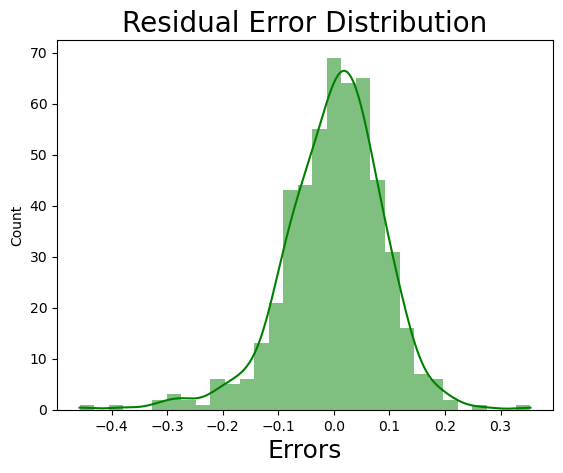

In [54]:
graph = y_train - y_train_pred
sns.histplot(graph, kde = True, color='green', edgecolor='none')
plt.title('Residual Error Distribution', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)
plt.show()

- Errors are normally distributed.

### Residuals Vs Predicted Values of y_train

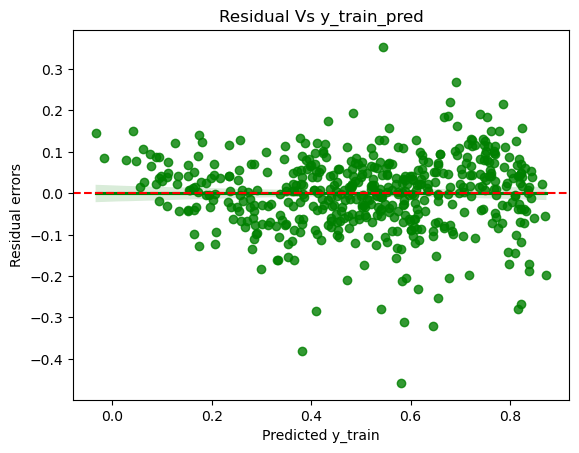

In [55]:
sns.regplot(x=y_train_pred, y=graph, color = 'green')
plt.axhline(y=0, color='red', linestyle='--')  
plt.title('Residual Vs y_train_pred')
plt.xlabel('Predicted y_train')
plt.ylabel('Residual errors')
plt.show()

- Errors are packed near zero

### Homoscedasticity and Linearity Check

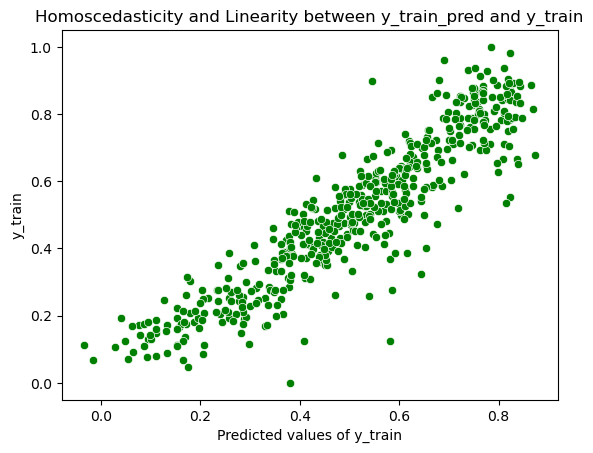

In [56]:
sns.scatterplot(x=y_train_pred, y=y_train, color = 'green')
plt.title('Homoscedasticity and Linearity between y_train_pred and y_train')
plt.xlabel('Predicted values of y_train')
plt.ylabel('y_train')
plt.show()

- The residuals display approximately uniform variance across the spectrum of predicted values, indicating that the model exhibits homoscedasticity.

## 7. Model Testing

### Selecting Columns that were Considered in the Final Model

In [57]:
X_test_rfe = X_test[X_train_rfe.columns].reset_index(drop=True)
X_test_rfe.head()

,yr,holiday,temp,windspeed,season_Spring,season_Winter,mnth_Dec,mnth_Jan,mnth_July,mnth_Nov,mnth_Sep,weathersit_2,weathersit_3
0,0,1,0.831783,0.084219,0,0,0,0,1,0,0,True,False
1,1,0,0.901354,0.153728,0,0,0,0,0,0,0,False,False
2,0,0,0.511964,0.334206,0,1,0,0,0,0,0,True,False
3,0,0,0.881625,0.339570,0,0,0,0,0,0,0,False,False
4,0,0,0.817246,0.537414,0,0,0,0,0,0,0,False,False


In [58]:
X_test_rfe.describe()

,yr,holiday,temp,windspeed,season_Spring,season_Winter,mnth_Dec,mnth_Jan,mnth_July,mnth_Nov,mnth_Sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.558941,0.313350,0.255708,0.232877,0.086758,0.077626,0.105023,0.073059,0.086758
std,0.500722,0.188034,0.233698,0.159947,0.437258,0.423633,0.282125,0.268194,0.307285,0.260830,0.282125
min,0.000000,0.000000,0.046591,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.198517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.558691,0.299459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.759096,0.403048,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.984424,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Adding Constants

In [59]:
X_test_rfe_cons = sm.add_constant(X_test_rfe)
X_test_rfe_cons.head()

,const,yr,holiday,temp,windspeed,season_Spring,season_Winter,mnth_Dec,mnth_Jan,mnth_July,mnth_Nov,mnth_Sep,weathersit_2,weathersit_3
0,1.0,0,1,0.831783,0.084219,0,0,0,0,1,0,0,True,False
1,1.0,1,0,0.901354,0.153728,0,0,0,0,0,0,0,False,False
2,1.0,0,0,0.511964,0.334206,0,1,0,0,0,0,0,True,False
3,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0,0,False,False
4,1.0,0,0,0.817246,0.537414,0,0,0,0,0,0,0,False,False


### Predicting y_test Values

In [60]:
y_test_pred = lr.predict(X_test_rfe_cons)
y_test_pred = y_test_pred.astype(float)

### R-squared of Predicted Test Data

In [61]:
r2 = r2_score(y_true = y_test, y_pred = y_test_pred)
r2

0.8161282341346275

## 8. Model Inference
### R-squared of the the predicted test data is ~0.82. Hence, the model is stable and reliable.

### Linearity Check of the Predicted values and Actual values

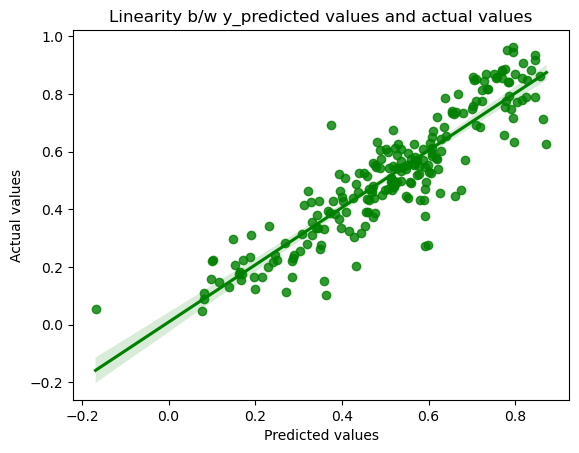

In [62]:
sns.regplot(x=y_test_pred, y=y_test, color = 'green')
plt.title('Linearity b/w y_predicted values and actual values')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

### Parameters of the Best Fit Line

In [63]:
lr.params.sort_values(ascending=False)

temp             0.402583
const            0.289327
yr               0.234795
season_Winter    0.064977
mnth_Sep         0.053670
mnth_Nov        -0.048827
mnth_Dec        -0.050984
mnth_Jan        -0.055626
mnth_July       -0.064343
weathersit_2    -0.081190
holiday         -0.091280
season_Spring   -0.103373
windspeed       -0.154010
weathersit_3    -0.294885
dtype: float64

### The Top 3 Features Explaining the Demand of Shared Bikes
1. **'temp':** This feature indicates that for every unit increase in temp value (temperature), the no. of bikes rented (cnt) increases by 0.4 units.
2. **'weathersit_3':** This feature indicates that for every unit increase in weathersit_3 value, the no. of bikes rented (cnt) decreases by 0.29 units.
3. **'yr':** This feature indicates that for every unit increase in yr value (year), the no. of bikes rented (cnt) increases by 0.23 units.

### Equation of the Best Fitted Multiple Linear Regression Line

### y = 0.289327 + (0.402583 × temp) + (0.234795 × yr) + (0.064977 ×s eason_Winter) + (0.053670 × mnth_Sep) − (0.048827 × mnth_Nov) − (0.050984 × mnth_Dec) − (0.055626 × mnth_Jan) − (0.064343 × mnth_July) − (0.081190 × weathersit_2) − (0.091280 × holiday) − (0.103373 × season_Spring)− (0.154010 × windspeed) − (0.294885 × weathersit_3)